# PHASE 1: Platform Classification using Supervised Learning Methods - Building Training and Test datasets (part 2)

### References:
* https://www.quora.com/What-is-the-best-way-to-create-a-training-set-for-machine-learning/answer/Clem-Wang-1

## Main Python libraries

In [1]:
import os, sys, pathlib
from IPython.display import display, Math, Latex #also '%%latex' magic command
import collections, itertools, operator, re, copy, datetime
import urllib, urllib.request, urllib.parse, dns, ipwhois
import pickle, json, csv, zipfile
import math, random, numpy, scipy, pandas
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import bs4
import nltk, sklearn

#actualcwd = os.getcwd()
#os.chdir(actualcwd)
#print(os.getcwd())

In [2]:
#a simple but not adequate hack to solve:
#-- that this notebook will include any passed module that exists on top of its folder
#-- that my installation of the the nltk will find the correct path to the nlkt_data folder
#
#once this line is run, IT SHOULDN'T RUN AGAIN!, otherwise the cwd will change into something different; 
#it can restored though in different ways, one by using `actualcwd` variable or in some cases shuting down this notebook
#
#
os.chdir('../..')
#print(os.getcwd())
sys.path.append(os.getcwd())
import config.config as config

#print(config.anacondadir)

if os.path.exists(config.anacondadir):
    print('ok')
    nltk.data.path.append(config.anacondadir)

ok


In [10]:
STOP HERE!!

SyntaxError: invalid syntax (<ipython-input-10-bfc7f4b2e6e8>, line 1)

In [11]:
#OBSERVATION!: name of file has been changed to reflect last updated file 
if pathlib.Path(os.getcwd()+'/data/annotatedplatformsphase1_a1.csv').is_file():
    pd_annotated = pandas.read_csv(open(os.getcwd()+'/data/annotatedplatformsphase1_a1.csv', 'r'), sep=';', quotechar="'")
else:
    print('Not path found')

In [12]:
pd_annotated.head(5)

,Unnamed: 0,Unnamed: 0.1,platform,title,description,keywords,htext,params,category_regex,wiki,category
0,0,0,v4-alpha.getbootstrap.com,"\n \n bootstrap · the most popular html, c...","the most popular html, css, and js framework i...",,"Bootstrap is the most popular HTML, CSS, and J...",",/components,/components/breadcrumb/,/migratio...",api|package|framework|librar|stack|licens|addo...,NaN,PACKAGE
1,1,3,jscroll.com,jscroll - a jquery plugin for infinite scrolli...,,,jScroll is a jQuery plugin for infinite scroll...,"/,https://github.com/cubiq/iscroll",api|package|framework|librar|stack|licens|addo...,NaN,PACKAGE
2,2,10,mongoosejs.com,mongoose odm v4.10.5,,,Elegant MongoDB object modeling for Node.js Mo...,"/docs/promises.html,/docs/populate.html,/docs/...",api|package|framework|librar|stack|licens|addo...,NaN,PACKAGE
3,3,34,www.highcharts.com,Interactive JavaScript charts for your webpage...,Highcharts - Interactive JavaScript charts for...,"highcharts, charts, javascript charts, ajax ch...",View demo Get a license,"/samples/data/jsonp.php,/blog/192-use-highchar...",api|package|framework|librar|stack|licens|addo...,NaN,PACKAGE
4,4,41,www.crossorigin.me,crossorigin.me,,,"\n Welcome to crossorigin.me,...","/https://en.wikipedia.org/w/api.php,/,/https:/...",api|package|framework|librar|stack|licens|addo...,NaN,PACKAGE


In [13]:
#OBSERVATION!: name of file has been changed to reflect last updated file 
if pathlib.Path(os.getcwd()+'/data/notatedplatformsphase1_a1.csv').is_file():
    pd_notated = pandas.read_csv(open(os.getcwd()+'/data/notatedplatformsphase1_a1.csv', 'r'), sep=';', quotechar="'")
else:
    print('Not path found')

In [14]:
pd_notated.head(5)

,Unnamed: 0,Unnamed: 0.1,platform,title,description,keywords,htext,params,category,wiki
0,0,0,www.kenneth-truyers.net,my life as a software developer |,blog about development using .net and client-s...,,"Posted on Friday, January 27th, 2017 at 02:42 ...",/2013/04/20/javascript-hoisting-explained/,NaN,NaN
1,1,1,school.scotch.io,courses ― scotch,,,You trust Scotch tutorials and Scotch authors....,"/build-a-nodejs-website/course-introduction,/b...",NaN,NaN
2,2,2,www.imkrisna.com,i made krisna widhiastra | full-stack developer,,,\n\t\t\t\t\t\t\tCurrently working as Applicati...,/blog/2014/02/if-else-vs-if-if-vs-switch-javas...,NaN,NaN
3,3,3,vanilla-js.com,vanilla js,,,The Vanilla JS team maintains every byte of co...,/,NaN,NaN
4,4,4,www.newmediacampaigns.com,new media campaigns | nmc digital agency,NaN,,Congrats to Hutchison PLLC on being named one ...,/blog/how-to-use-json-apis-with-jquery,NaN,NaN


## DATA UPDATING - Important...

The code commented below was used to:
* **Add wikipedia info to the created tables**: for this I used the `scr.wikipedia_extract` module made for this purpose
* **Revise some column naming and use the names for categories** to be used from now on: until now (29-July-17), I was using as categories a regex form I used for the original classification rules; from now I will be using the defined categories found in the `docs` folder of this work

The changes below were done by creating updated files, re-opening that file and update it until the right file was created. Once the information was updated with some information, the respective code was commented because it was not of usage any more.

The code below is kept commented but is shown so other users of this file can have a reference. Also the different intermediate files are kept in the `data` folder but only the required files are called for further analysis. In a more advanced phase a simpler file will be kept.

In [15]:
#import scr.wikipedia_extract

In [16]:
#import imp

In [17]:
#imp.reload(scr.wikipedia_extract)

In [18]:
#pd_annotated['wiki'] = ''
#pd_notated['wiki'] = ''
#scr.wikipedia_extract.getting_wikipedia(pd_annotated)
#scr.wikipedia_extract.getting_wikipedia(pd_notated)

In [19]:
#pd_errortemp = pd_notated.loc[pd_notated['platform'] == 'view-source:http:',]
#scr.wikipedia_extract.getting_wikipedia(pd_errortemp)
#print(pd_errortemp)
#print(pd_notated.iloc[110,])
#url = 'https://en.wikipedia.org/w/api.php?action=query&list=search&format=json&srsearch=JavaScript Objects in Detail'
#req = urllib.request.Request(url)
#try:
#    resp = urllib.request.urlopen(req)
#except urllib.error.HTTPError as e:
#    print(e)

In [20]:
#pd_notated.head(100)

In [21]:
#pd_annotated = pd_annotated.rename(columns={'category':'category_regex'})

In [22]:
#pd_annotated.columns

In [23]:
#categories = pandas.read_csv(open(os.getcwd()+'/docs/category_operationalization.csv', 'r'), sep=':')

In [24]:
#categories

In [25]:
#categories = categories[['category','category_regex']]

In [26]:
#pd_annotated = pandas.merge(pd_annotated, categories, on=['category_regex'])

In [27]:
#pd_annotated.head(5)

In [28]:
#pd_annotated.to_csv(os.getcwd()+'/data/annotatedplatformsphase1_a1.csv', sep=';', quotechar="'")
#pd_notated.to_csv(os.getcwd()+'/data/notatedplatformsphase1_a1.csv', sep=';', quotechar="'")

In [29]:
STOP HERE!

SyntaxError: invalid syntax (<ipython-input-29-d5af98942240>, line 1)

## DATA PREPARATION

In [30]:
import scr.datapreparation_ML

ok


In [31]:
#imp.reload(scr.datapreparation_ML)

In [32]:
for col in pd_annotated.columns:
    print(col,' has the following null values: ', pd_annotated[[col]].isnull().sum())

Unnamed: 0  has the following null values:  Unnamed: 0    0
dtype: int64
Unnamed: 0.1  has the following null values:  Unnamed: 0.1    0
dtype: int64
platform  has the following null values:  platform    0
dtype: int64
title  has the following null values:  title    1
dtype: int64
description  has the following null values:  description    11
dtype: int64
keywords  has the following null values:  keywords    2
dtype: int64
htext  has the following null values:  htext    0
dtype: int64
params  has the following null values:  params    6
dtype: int64
category_regex  has the following null values:  category_regex    0
dtype: int64
wiki  has the following null values:  wiki    373
dtype: int64
category  has the following null values:  category    0
dtype: int64


In [33]:
pd_annotated.shape

(450, 11)

In [34]:
for col in pd_notated.columns:
    print(col,' has the following null values: ', pd_notated[[col]].isnull().sum())

Unnamed: 0  has the following null values:  Unnamed: 0    0
dtype: int64
Unnamed: 0.1  has the following null values:  Unnamed: 0.1    0
dtype: int64
platform  has the following null values:  platform    0
dtype: int64
title  has the following null values:  title    2
dtype: int64
description  has the following null values:  description    9
dtype: int64
keywords  has the following null values:  keywords    3
dtype: int64
htext  has the following null values:  htext    0
dtype: int64
params  has the following null values:  params    13
dtype: int64
category  has the following null values:  category    323
dtype: int64
wiki  has the following null values:  wiki    270
dtype: int64


In [35]:
pd_notated.shape

(323, 10)

In [36]:
pd_annotated['alltext'] = ''
scr.datapreparation_ML.datapreparation(pd_annotated)
pd_notated['alltext'] = ''
scr.datapreparation_ML.datapreparation(pd_notated)

In [37]:
STOP HERE!

SyntaxError: invalid syntax (<ipython-input-37-d5af98942240>, line 1)

# ANALYSIS ROUND 1

## References:
* http://scikit-learn.org/stable/modules/cross_validation.html
* https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

## DATA SPLIT

In [ ]:
#from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest = train_test_split(pd_annotated.alltext, pd_annotated.category, test_size=0.1, random_state=0)

In [ ]:
train=pd_annotated[['platform', 'alltext','category']].sample(frac=0.75,random_state=0)
test=pd_annotated[['platform', 'alltext','category']].drop(train.index)

In [ ]:
train.head(10)

## DATA MODELLING - VECTOR MODEL 1

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect_r1 = CountVectorizer(ngram_range=(1,2))
X_primercounts = count_vect_r1.fit_transform(train.alltext)
X_primercounts.shape

## DECISION TREE WITH ADABOOST, CLASSIFICATION 1

### References:
* http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
* http://scikit-learn.org/stable/modules/tree.html
* https://en.wikipedia.org/wiki/AdaBoost
* http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_hastie_10_2.html#sphx-glr-auto-examples-ensemble-plot-adaboost-hastie-10-2-py
* https://stackoverflow.com/questions/32210569/using-gridsearchcv-with-adaboost-and-decisiontreeclassifier
* http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html
* http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

**Also**:
* https://stackoverflow.com/questions/33110973/pass-a-dict-to-scikit-learn-estimator
* http://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/

### Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf_dtm_r1_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1, random_state=0)
clf_dt_r1_stump = clf_dtm_r1_stump.fit(X_primercounts, train.category)

clf_dtm_r1 = DecisionTreeClassifier(min_samples_leaf=2, random_state=0)
clf_dt_r1 = clf_dtm_r1.fit(X_primercounts, train.category)

### Exploration of the Classification

In [ ]:
X_test1counts_stump = count_vect_r1.transform(test.alltext)
predicted_dt_r1_stump = clf_dt_r1_stump.predict(X_test1counts_stump)

In [ ]:
#for platform, category in zip(test.platform, predicted_dt_r1_stump):
#    print('%r => %s' % (platform, category))

In [ ]:
X_test1counts = count_vect_r1.transform(test.alltext)
predicted_dt_r1 = clf_dt_r1.predict(X_test1counts)

In [ ]:
#for platform, category in zip(test.platform, predicted_dt_r1):
#    print('%r => %s' % (platform, category))

### Parameter Searching for the Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the parameters by cross-validation
tuned_parameters = [{'max_depth': numpy.arange(5,25,5)}]
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(clf_dtm_r1, tuned_parameters, cv=2,
                       scoring='%s_macro' % score)
    clf.fit(X_primercounts, train.category)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_predsearch = test.category, clf.predict(X_test1counts)
    print(classification_report(y_true, y_predsearch))
    print()

In [ ]:
X_test1counts_stump = count_vect_r1.transform(test.alltext)
clf_dt_r1_stump_err = 1.0 - clf_dt_r1_stump.score(X_test1counts_stump, test.category)
X_test1count = count_vect_r1.transform(test.alltext)
clf_err = 1.0 - clf.score(X_test1counts, test.category)

In [ ]:
print(clf_dt_r1_stump_err,clf_dt_r1_err)

In [ ]:
print(clf.best_params_)

### AdaBoost

In [ ]:
n_estimators = 40
# A learning rate of 1. may not be optimal for both SAMME and SAMME.R
learning_rate = 1.


#IMPORTANT... https://stackoverflow.com/questions/33110973/pass-a-dict-to-scikit-learn-estimator
clf_dtm_r1.set_params(**clf.best_params_)
clf_dt_r1 = clf_dtm_r1.fit(X_primercounts, train.category)

ada_discrete = AdaBoostClassifier(
    base_estimator = clf_dtm_r1,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME")
ada_discrete.fit(X_primercounts, train.category)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [clf_dt_r1_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators], [clf_dt_r1_err] * 2, 'k--',
        label='Decision Tree Error')

ada_discrete_err = numpy.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_test1counts)):
    ada_discrete_err[i] = zero_one_loss(y_pred, test.category)

ada_discrete_err_train = numpy.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_primercounts)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, train.category)

ax.plot(numpy.arange(n_estimators) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(numpy.arange(n_estimators) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')

ax.set_ylim((0.0, 1.0))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

In [ ]:
with open(os.getcwd()+'/data/adaboostmodel1.pkl', 'bw') as mod:
    pickle.dump([train, test, train.alltext, train.category, count_vect_r1, X_primercounts, clf_dtm_r1, clf_dt_r1, ada_discrete, n_estimators, learning_rate], mod)

## Classifying unlabelled records

In [ ]:
X_unclass1counts = count_vect_r1.transform(pd_notated.alltext)
#normalized_X_testround1_counts = sklearn.feature_extraction.text.TfidfTransformer(norm='l2').fit_transform(X_testround1_counts)
predicted_dtada_r1 = ada_discrete.predict(X_unclass1counts)

In [ ]:
for platform, category in zip(pd_notated.platform, predicted_dtada_r1):
    print('%r => %s' % (platform, category))

In [ ]:
with open(os.getcwd()+'/data/abadt_1.csv', 'w') as outfile:
    writer = csv.writer(outfile, delimiter=';', quotechar="'")
    writer.writerow(['platform','assignedcategory','checked','category'])
    for platform, category in zip(pd_notated.platform, predicted_dtada_r1):
        #print('%r => %s' % (platform, category))
        writer.writerow([platform,category,,])

In [ ]:
STOP HERE!!

# POST-ANALYSIS ROUND 1

Data preparation after the manual supervision of the classes

### Python Libraries

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## DATA PREPARATION

In [39]:
with open(os.getcwd()+'/data/adaboostmodel1.pkl', 'br') as mod:
    train, test, train.alltext, train.category, count_vect_r1, X_primercounts, clf_dtm_r1, clf_dt_r1, ada_discrete, n_estimators, learning_rate = pickle.load(mod)

In [40]:
test.head()

,platform,alltext,category
0,v4-alpha.getbootstrap.com,buttons world overview content breadcrumb in...,PACKAGE
9,jqueryvalidation.org,still good lots validate options error comes...,PACKAGE
25,api.datamarket.azure.com,microsoft bing azure search v1 composite sal...,PACKAGE
28,preview.c9users.io,arshdkhn1 box chaoz4ngel insert index pollin...,PACKAGE
31,chaijs.com,node org browser delightfully paired asserti...,PACKAGE


In [41]:
X_unclass1counts = count_vect_r1.transform(pd_notated.alltext)

In [43]:
pd_notatedready_r1 = pandas.read_csv(open(os.getcwd()+'/data/abadt_1.csv', 'r'), sep=';', quotechar="'" )

In [46]:
pd_notatedready_r1.loc[pd_notatedready_r1['checked'] != 1, :].shape

(238, 4)

In [47]:
pd_notatedready_r1.shape

(323, 4)

## EVALUATION

In [48]:
print(classification_report(pd_notatedready_r1.loc[pd_notatedready_r1['checked'] != -1, 'category'], pd_notatedready_r1.loc[pd_notatedready_r1['checked'] != -1, 'assignedcategory']))

             precision    recall  f1-score   support

   BUSINESS       0.00      0.00      0.00         2
   COMMUITY       0.00      0.00      0.00         9
       DOCS       0.33      0.20      0.25         5
  ECOMMERCE       0.00      0.00      0.00         1
       NEWS       0.62      0.83      0.71        48
    NOCLASS       1.00      0.25      0.40        12
       PAAS       0.00      0.00      0.00         2
    PACKAGE       0.48      0.81      0.60        36
       REPL       1.00      0.20      0.33         5
    SENGINE       0.00      0.00      0.00         2
      THEME       0.00      0.00      0.00         2
   TRAINING       0.92      0.55      0.69        20

avg / total       0.58      0.59      0.54       144



/home/ec/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# ANALYSIS 2

## RECONSTRUCTING THE DATASETS

In [54]:
pd_notated2 = pd_notated.loc[pd_notatedready_r1['checked'] == -1,:]
pd_notated2.head()

,Unnamed: 0,Unnamed: 0.1,platform,title,description,keywords,htext,params,category,wiki,alltext
37,37,37,editor.wix.com,free website builder | create a free website |...,create a free website with wix.com. customize ...,,A man looks out towards the city skyline. It A...,/html/editor/web/renderer/new,NaN,Wix.com is a cloud-based web development platf...,starts city customizing looks builder websit...
38,38,38,genius.com,genius song lyrics & knowledge,,,,/Nested-loops-javascript-what-are-you-lyrics,NaN,Genius (formerly Rap Genius) is an online medi...,lyrics javascript loops song nested genius k...
39,39,39,jsben.ch,jsben.ch benchmarking for javascript,online javascript benchmark tool / playground....,"javascript, benchmark, online, testing, code e...",,/,NaN,NaN,performance editor comparison javascript cod...
40,40,40,www.infobyip.com,information by ip address,information for ip address and browser: locati...,"ip, address, information","InfoByIp.com provides IP detection, geolocatio...",/htmlandjavascripteditor.php,NaN,NaN,client city flash list ipv6 information geol...
41,41,41,app.cssmenumaker.com,menu maker,,,,/,NaN,NaN,maker menu


In [55]:
pd_annotatedtrans = pd_notated.loc[pd_notatedready_r1['checked'] != -1,:]
pd_annotatedtrans['category'] = pd_notatedready_r1.loc[pd_notatedready_r1['checked'] != -1,'category']

/home/ec/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [56]:
pd_annotatedtrans.head()

,Unnamed: 0,Unnamed: 0.1,platform,title,description,keywords,htext,params,category,wiki,alltext
0,0,0,www.kenneth-truyers.net,my life as a software developer |,blog about development using .net and client-s...,,"Posted on Friday, January 27th, 2017 at 02:42 ...",/2013/04/20/javascript-hoisting-explained/,NEWS,NaN,client far xbmc information life developer b...
1,1,1,school.scotch.io,courses ― scotch,,,You trust Scotch tutorials and Scotch authors....,"/build-a-nodejs-website/course-introduction,/b...",TRAINING,NaN,scotch website join trust introduction nodej...
2,2,2,www.imkrisna.com,i made krisna widhiastra | full-stack developer,,,\n\t\t\t\t\t\t\tCurrently working as Applicati...,/blog/2014/02/if-else-vs-if-if-vs-switch-javas...,NEWS,NaN,performance else developer future profession...
3,3,3,vanilla-js.com,vanilla js,,,The Vanilla JS team maintains every byte of co...,/,PACKAGE,NaN,maintains small make hard code introduction ...
4,4,4,www.newmediacampaigns.com,new media campaigns | nmc digital agency,NaN,,Congrats to Hutchison PLLC on being named one ...,/blog/how-to-use-json-apis-with-jquery,BUSINESS,NaN,lawyerist json agency hutchison blog website...


In [57]:
pd_annotated2 = pandas.concat([pd_annotated, pd_annotatedtrans], ignore_index = True)
pd_annotated2.head(10)

,Unnamed: 0,Unnamed: 0.1,alltext,category,category_regex,description,htext,keywords,params,platform,title,wiki
0,0,0,alerts building dropdowns tooltips started g...,PACKAGE,api|package|framework|librar|stack|licens|addo...,"the most popular html, css, and js framework i...","Bootstrap is the most popular HTML, CSS, and J...",,",/components,/components/breadcrumb/,/migratio...",v4-alpha.getbootstrap.com,"\n \n bootstrap · the most popular html, c...",NaN
1,1,3,iscroll link ability ajax page end autopager...,PACKAGE,api|package|framework|librar|stack|licens|addo...,,jScroll is a jQuery plugin for infinite scroll...,,"/,https://github.com/cubiq/iscroll",jscroll.com,jscroll - a jquery plugin for infinite scrolli...,NaN
2,2,10,started schematypes validation models v4 pro...,PACKAGE,api|package|framework|librar|stack|licens|addo...,,Elegant MongoDB object modeling for Node.js Mo...,,"/docs/promises.html,/docs/populate.html,/docs/...",mongoosejs.com,mongoose odm v4.10.5,NaN
3,3,34,stock ajax webpage data highcharts view page...,PACKAGE,api|package|framework|librar|stack|licens|addo...,Highcharts - Interactive JavaScript charts for...,View demo Get a license,"highcharts, charts, javascript charts, ajax ch...","/samples/data/jsonp.php,/blog/192-use-highchar...",www.highcharts.com,Interactive JavaScript charts for your webpage...,NaN
4,4,41,en org crossorigin proxy free php cors w eve...,PACKAGE,api|package|framework|librar|stack|licens|addo...,,"\n Welcome to crossorigin.me,...",,"/https://en.wikipedia.org/w/api.php,/,/https:/...",www.crossorigin.me,crossorigin.me,NaN
5,5,47,,PACKAGE,api|package|framework|librar|stack|licens|addo...,,,,NaN,v4-alpha.getbootstrap.com),,NaN
6,6,52,goes json neville good james weaver brody qu...,PACKAGE,api|package|framework|librar|stack|licens|addo...,,Good design goes to heaven; bad design goes ev...,,",/lowell-williams/&quot;},/wp-json/post/,/,/ap...",quotesondesign.com,quotes on design -,NaN
7,7,53,space random quotesondesign bow json googlea...,PACKAGE,api|package|framework|librar|stack|licens|addo...,,"\n Welcome to crossorigin.me,...",,",/http://api.open,/https://en.wikipedia.org/w/...",crossorigin.me,crossorigin.me,NaN
8,8,54,minified events truly news javascript handle...,PACKAGE,api|package|framework|librar|stack|licens|addo...,,\nThis demo shows you how to use a simple HTML...,,/,minifiedjs.com,minified.js - a truly lightweight javascript l...,NaN
9,9,59,building scratch methods email offering vali...,PACKAGE,api|package|framework|librar|stack|licens|addo...,,This jQuery plugin makes simple clientside for...,,/validate/,jqueryvalidation.org,jquery validation plugin | form validation wit...,NaN


## DATA SPLIT

In [58]:
#from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest = train_test_split(pd_annotated.alltext, pd_annotated.category, test_size=0.1, random_state=0)

In [62]:
train2=pd_annotated2[['platform', 'alltext','category']].sample(frac=0.75,random_state=0)
test2=pd_annotated2[['platform', 'alltext','category']].drop(train2.index)

In [63]:
train2.head(10)

,platform,alltext,category
240,blog.soulserv.net,web start node asynchronously exiting php ju...,NEWS
132,cameronspear.com,cameron docker foundation first blog develop...,NEWS
424,docs.mashape.com,mashape manage developer bible dev javascrip...,DOCS
92,startupquote.com,wisdom yc quote json startup making sq read ...,PACKAGE
170,www.yourtechchick.com,fouc information without technology dedicate...,NEWS
469,mochajs.org,test flexible javascript backers mocha fun f...,PACKAGE
574,gruntjs.com,repetitive task minification automation basi...,PACKAGE
587,blogs.msdn.microsoft.com,information blogs msdn latest news javascrip...,NEWS
187,blog.mgechev.com,michael ajax gechev theme editorial blog con...,NEWS
229,saijogeorge.com,saijo name george melbourne consultants stra...,NEWS


## DATA MODELLING - VECTOR MODEL 2

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect_r2 = CountVectorizer(ngram_range=(1,2))
X_primercounts2 = count_vect_r2.fit_transform(train2.alltext)
X_primercounts2.shape

(446, 15480)

## DECISION TREE WITH ADABOOST, CLASSIFICATION 2

### References:
* http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
* http://scikit-learn.org/stable/modules/tree.html
* https://en.wikipedia.org/wiki/AdaBoost
* http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_hastie_10_2.html#sphx-glr-auto-examples-ensemble-plot-adaboost-hastie-10-2-py
* https://stackoverflow.com/questions/32210569/using-gridsearchcv-with-adaboost-and-decisiontreeclassifier
* http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html
* http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

**Also**:
* https://stackoverflow.com/questions/33110973/pass-a-dict-to-scikit-learn-estimator
* http://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/

### Models

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier

In [67]:
clf_dtm_r2_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1, random_state=0)
clf_dt_r2_stump = clf_dtm_r2_stump.fit(X_primercounts2, train2.category)

clf_dtm_r2 = DecisionTreeClassifier(min_samples_leaf=2, random_state=0)
clf_dt_r2 = clf_dtm_r2.fit(X_primercounts2, train2.category)

### Exploration of the Classification

In [68]:
X_test2counts_stump = count_vect_r2.transform(test2.alltext)
predicted_dt_r2_stump = clf_dt_r2_stump.predict(X_test2counts_stump)

In [69]:
#for platform, category in zip(test.platform, predicted_dt_r1_stump):
#    print('%r => %s' % (platform, category))

In [70]:
X_test2counts = count_vect_r2.transform(test2.alltext)
predicted_dt_r2 = clf_dt_r2.predict(X_test2counts)

In [71]:
#for platform, category in zip(test.platform, predicted_dt_r1):
#    print('%r => %s' % (platform, category))

### Parameter Searching for the Decision Tree

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the parameters by cross-validation
tuned_parameters = [{'max_depth': numpy.arange(5,25,2)}]
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(clf_dtm_r2, tuned_parameters, cv=2,
                       scoring='%s_macro' % score)
    clf.fit(X_primercounts2, train2.category)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_predsearch = test2.category, clf.predict(X_test2counts)
    print(classification_report(y_true, y_predsearch))
    print()

# Tuning hyper-parameters for precision



/home/ec/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec/anaconda3/lib/python3.5/sit

Best parameters set found on development set:

{'max_depth': 21}

Grid scores on development set:

0.179 (+/-0.031) for {'max_depth': 5}
0.195 (+/-0.001) for {'max_depth': 7}
0.177 (+/-0.070) for {'max_depth': 9}
0.184 (+/-0.047) for {'max_depth': 11}
0.173 (+/-0.030) for {'max_depth': 13}
0.189 (+/-0.057) for {'max_depth': 15}
0.220 (+/-0.002) for {'max_depth': 17}
0.211 (+/-0.009) for {'max_depth': 19}
0.236 (+/-0.027) for {'max_depth': 21}
0.202 (+/-0.060) for {'max_depth': 23}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

   BUSINESS       0.00      0.00      0.00         2
   COMMUITY       0.00      0.00      0.00         2
       DOCS       0.00      0.00      0.00         3
  ECOMMERCE       0.00      0.00      0.00         0
       NEWS       0.52      0.81      0.63        58
    NOCLASS       0.00      0.00      0.00         9
     

/home/ec/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Best parameters set found on development set:

{'max_depth': 21}

Grid scores on development set:

0.172 (+/-0.007) for {'max_depth': 5}
0.157 (+/-0.014) for {'max_depth': 7}
0.164 (+/-0.038) for {'max_depth': 9}
0.165 (+/-0.010) for {'max_depth': 11}
0.162 (+/-0.005) for {'max_depth': 13}
0.185 (+/-0.045) for {'max_depth': 15}
0.215 (+/-0.005) for {'max_depth': 17}
0.200 (+/-0.001) for {'max_depth': 19}
0.231 (+/-0.034) for {'max_depth': 21}
0.226 (+/-0.026) for {'max_depth': 23}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

   BUSINESS       0.00      0.00      0.00         2
   COMMUITY       0.00      0.00      0.00         2
       DOCS       0.00      0.00      0.00         3
  ECOMMERCE       0.00      0.00      0.00         0
       NEWS       0.52      0.81      0.63        58
    NOCLASS       0.00      0.00      0.00         9
     

/home/ec/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [91]:
X_test2counts_stump = count_vect_r2.transform(test2.alltext)
clf_dt_r2_stump_err = 1.0 - clf_dt_r2_stump.score(X_test2counts_stump, test2.category)
X_test2count = count_vect_r2.transform(test2.alltext)
clf_dt_r2_err = 1.0 - clf.score(X_test2counts, test2.category)

/home/ec/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [92]:
print(clf_dt_r2_stump_err,clf_dt_r2_err)

0.608108108108 0.82808086662


In [93]:
print(clf.best_params_)

{'max_depth': 21}


### AdaBoost

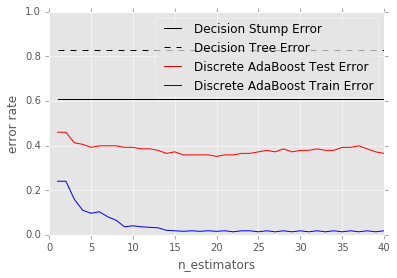

In [100]:
n_estimators = 40
# A learning rate of 1. may not be optimal for both SAMME and SAMME.R
learning_rate = .2


#IMPORTANT... https://stackoverflow.com/questions/33110973/pass-a-dict-to-scikit-learn-estimator
clf_dtm_r2.set_params(**clf.best_params_)
clf_dt_r2 = clf_dtm_r2.fit(X_primercounts2, train2.category)

ada_discrete = AdaBoostClassifier(
    base_estimator = clf_dtm_r2,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME")
ada_discrete.fit(X_primercounts2, train2.category)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [clf_dt_r2_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators], [clf_dt_r2_err] * 2, 'k--',
        label='Decision Tree Error')

ada_discrete_err = numpy.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_test2counts)):
    ada_discrete_err[i] = zero_one_loss(y_pred, test2.category)

ada_discrete_err_train = numpy.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_primercounts2)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, train2.category)

ax.plot(numpy.arange(n_estimators) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(numpy.arange(n_estimators) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')

ax.set_ylim((0.0, 1.0))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

In [95]:
Stop HERE!

SyntaxError: invalid syntax (<ipython-input-95-9e393413bcf7>, line 1)

In [ ]:
with open(os.getcwd()+'/data/adaboostmodel1.pkl', 'bw') as mod:
    pickle.dump([train, test, train.alltext, train.category, count_vect_r1, X_primercounts, clf_dtm_r1, clf_dt_r1, ada_discrete, n_estimators, learning_rate], mod)

## Classifying unlabelled records

In [ ]:
X_unclass1counts = count_vect_r1.transform(pd_notated.alltext)
#normalized_X_testround1_counts = sklearn.feature_extraction.text.TfidfTransformer(norm='l2').fit_transform(X_testround1_counts)
predicted_dtada_r1 = ada_discrete.predict(X_unclass1counts)

In [ ]:
for platform, category in zip(pd_notated.platform, predicted_dtada_r1):
    print('%r => %s' % (platform, category))

In [ ]:
with open(os.getcwd()+'/data/abadt_1.csv', 'w') as outfile:
    writer = csv.writer(outfile, delimiter=';', quotechar="'")
    writer.writerow(['platform','assignedcategory','checked','category'])
    for platform, category in zip(pd_notated.platform, predicted_dtada_r1):
        #print('%r => %s' % (platform, category))
        writer.writerow([platform,category,,])

# DUMPED!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
here stop

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

## RANDOM FOREST, CLASSIFICATION 1

### References:
* http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* http://scikit-learn.org/stable/modules/ensemble.html#forest

### Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import zero_one_loss

In [ ]:
n_estimators = 25
# A learning rate of 1. may not be optimal for both SAMME and SAMME.R
learning_rate = 1.

clf_rfm_r1_stump = RandomForestClassifier(max_depth=1, min_samples_leaf=1, n_estimators=n_estimators, random_state=0)
clf_rf_r1_stump = clf_rfm_r1_stump.fit(X_primercounts, train.category)

clf_rfm_r1 = RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=n_estimators, random_state=0)
clf_rf_r1 = clf_rfm_r1.fit(X_primercounts, train.category)

### Classification

In [ ]:
X_test1counts_stump = count_vect_r1.transform(test.alltext)
predicted_rf_r1_stump = clf_rf_r1_stump.predict(X_test1counts_stump)

In [ ]:
for platform, category in zip(test.platform, predicted_rf_r1_stump):
    print('%r => %s' % (platform, category))

In [ ]:
X_test1counts = count_vect_r1.transform(test.alltext)
predicted_rf_r1 = clf_rf_r1.predict(X_test1counts)

In [ ]:
for platform, category in zip(test.platform, predicted_rf_r1):
    print('%r => %s' % (platform, category))

In [ ]:
X_test1counts_stump = count_vect_r1.transform(test.alltext)
clf_rf_r1_stump_err = 1.0 - clf_rf_r1_stump.score(X_test1counts_stump, test.category)
X_test1count = count_vect_r1.transform(test.alltext)
clf_rf_r1_err = 1.0 - clf_rf_r1.score(X_test1counts, test.category)

In [ ]:
print(clf_rf_r1_stump_err,clf_rf_r1_err)